<a href="https://colab.research.google.com/github/AmirHoseein99/dataProjects/blob/master/Recognition_of_traffic_signs_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! wget "https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/20032/1111065/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1632895937&Signature=TeWlk%2FjlNLY27XCvg1tsqI%2BGWeOBiRu8ncdHRpR1EgYEbYrasywwgOn8Qa8OK3R5ZqJrr0ETFeR9T%2FtNo%2FHwI%2BdXUc2kuUBlL8Plviqx%2FDnuYwy%2Bu5Tl7%2B6CMFXNu1kOj689qDNmzV%2Fa44TjNicxl1MjgSbRGe%2BPTDab2nZfruOqEbRiRbgvCYbF2xeBGqQuybwDEcazgYRniNTOIStfiLKXGRi0%2BF9VN8JVeTADzvJZT6Hch7jIHSZ3XGuvHUP16b2rkLLbaZa7X3y1Z%2BnLuYsk6TZdPTJhmG4Q9%2BZa%2B5RAkfOIwZEwBXPda5fqq2nrOnafL1VijQ6xXTc9Mky1TQ%3D%3D&response-content-disposition=attachment%3B+filename%3Dcuboulder-image-labelling.zip"

The name is too long, 537 chars total.
Trying to shorten...
New name is archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1632895937&Signature=TeWlk%2FjlNLY27XCvg1tsqI+GWeOBiRu8ncdHRpR1EgYEbYrasywwgOn8Qa8OK3R5ZqJrr0ETFeR9T%2FtNo%2FHwI+dXUc2kuUBlL8Plviqx%2FDnuYwy+u5Tl7+6CMFXNu.
--2021-09-26 17:54:44--  https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/20032/1111065/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1632895937&Signature=TeWlk%2FjlNLY27XCvg1tsqI%2BGWeOBiRu8ncdHRpR1EgYEbYrasywwgOn8Qa8OK3R5ZqJrr0ETFeR9T%2FtNo%2FHwI%2BdXUc2kuUBlL8Plviqx%2FDnuYwy%2Bu5Tl7%2B6CMFXNu1kOj689qDNmzV%2Fa44TjNicxl1MjgSbRGe%2BPTDab2nZfruOqEbRiRbgvCYbF2xeBGqQuybwDEcazgYRniNTOIStfiLKXGRi0%2BF9VN8JVeTADzvJZT6Hch7jIHSZ3XGuvHUP16b2rkLLbaZa7X3y1Z%2BnLuYsk6TZdPTJhmG4Q9%2BZa%2B5RAkfOIwZEwBXPda5fqq2nrOnafL1VijQ6xXTc9Mky1TQ%3D%3D&response-content-disposition=attachment%3B+filename%3Dcuboulder-image-labelling.zip
Resolving stor

In [ ]:
! unzip "/content/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1632895937&Signature=TeWlk%2FjlNLY27XCvg1tsqI+GWeOBiRu8ncdHRpR1EgYEbYrasywwgOn8Qa8OK3R5ZqJrr0ETFeR9T%2FtNo%2FHwI+dXUc2kuUBlL8Plviqx%2FDnuYwy+u5Tl7+6CMFXNu"

Archive:  /content/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1632895937&Signature=TeWlk%2FjlNLY27XCvg1tsqI+GWeOBiRu8ncdHRpR1EgYEbYrasywwgOn8Qa8OK3R5ZqJrr0ETFeR9T%2FtNo%2FHwI+dXUc2kuUBlL8Plviqx%2FDnuYwy+u5Tl7+6CMFXNu
replace samples_oh.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
  inflating: train_and_test.npz      


In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras 
from matplotlib import pyplot as plt

In [ ]:
container = np.load("/content/train_and_test.npz" )
data = [container[key] for key in container]
X_train, y_train, X_test = data[0], data[1], data[2]

In [ ]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)

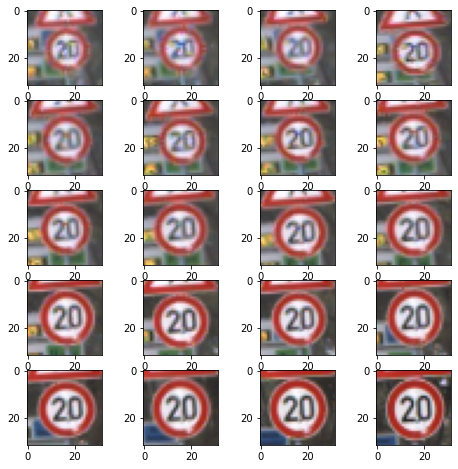

In [ ]:
w = 10
h = 10
fig = plt.figure(figsize=(8, 8))
columns = 4
rows = 5
for i in range(1, columns*rows +1):
    img = X_train[i]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

In [ ]:
clean_y_train = []
for i in range (y_train.shape[0]):
  for j in range (43):
    if y_train[i][j] == 1:
      clean_y_train.append(j)
clean_y_train = np.array(clean_y_train)

<BarContainer object of 43 artists>

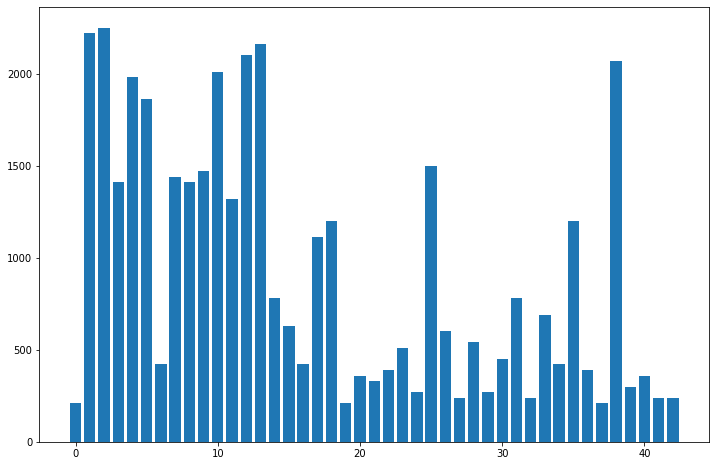

In [ ]:
unique, counts = np.unique(clean_y_train, return_counts=True)
plt.subplots(figsize=(12,8))
plt.bar(unique, counts)

In [ ]:
overSample=[]
for cls in unique:
  if counts[cls] < 1000:
    overSample.append(cls)
    # print(f"class : {cls}, Count {counts[cls]}\n")

In [ ]:
def getImg(cls):
  pervClass=0
  for i in range(cls):
    pervClass += counts[i]
  imgs=X_train[pervClass+1 : pervClass+counts[cls]+1]
  return np.array(imgs)

In [ ]:
from PIL import Image
def augmentaition(imgs, cls):
  newImgs=[]
  for i in range(len(imgs)) : 
    img = Image.fromarray(imgs[i])
    image_flip = img.transpose(Image.FLIP_TOP_BOTTOM)
    image_flip_2 = img.transpose(Image.FLIP_LEFT_RIGHT)
    rotImg_2 = img.rotate(90)
    rotImg = img.rotate(45)
    newImgs.append(np.array(list(image_flip.getdata())).reshape(32, 32, 3))
    newImgs.append(np.array(list(image_flip_2.getdata())).reshape(32, 32, 3))
    newImgs.append(np.array(list(rotImg_2.getdata())).reshape(32, 32, 3))
    newImgs.append(np.array(list(rotImg.getdata())).reshape(32, 32, 3))
  return newImgs

In [ ]:
allImgaes = []
allClasses = []
for cls in overSample:
  classes=[]
  imgs = getImg(cls)
  newImgs = augmentaition(imgs, cls)
  for i in range(len(newImgs)):
    classes.append(cls)
  allImgaes.append(newImgs)
  allClasses.append(classes)
  # print(f"len class {len(classes)}")
  # print(f"len of generated Imgaes for {cls} is {len(newImgs)}")

In [ ]:
for imgs in allImgaes:
  X_train = np.append(X_train, np.array(imgs), axis=0)
for cls in allClasses:
  cls = np.array(cls)
  clean_y_train = np.append(clean_y_train, cls, axis=0)

In [ ]:
X_train = X_train/255.0

In [ ]:
print(X_train.shape)
print(clean_y_train.shape)

(81201, 32, 32, 3)
(81201,)


In [ ]:
flatX = X_train.flatten().reshape(81201, 3072)

In [ ]:
X_df = pd.DataFrame(flatX)
y_df = pd.DataFrame(clean_y_train)

In [ ]:
y_df.columns = [''] * len(y_df.columns)

In [ ]:
y_df.columns

Index([''], dtype='object')

In [ ]:
ds = pd.concat({'' : X_df, 'target' : y_df}, axis=1)

In [ ]:
sampledDataset = ds.groupby("target").sample(n=1000, random_state=43)

In [ ]:
ds.head()

...                               target
          0         1         2         3  ...      3069      3070      3071       
0  0.294118  0.305882  0.313725  0.290196  ...  0.352941  0.380392  0.349020      0
1  0.270588  0.286275  0.286275  0.294118  ...  0.396078  0.407843  0.376471      0
2  0.282353  0.282353  0.282353  0.305882  ...  0.372549  0.380392  0.356863      0
3  0.266667  0.262745  0.262745  0.294118  ...  0.372549  0.341176  0.341176      0
4  0.286275  0.286275  0.294118  0.290196  ...  0.278431  0.278431  0.286275      0

[5 rows x 3073 columns]

In [ ]:
sampledDataset.shape

(43000, 3073)

In [ ]:
sampled_X_train = sampledDataset.iloc[:,:-1].to_numpy()

In [ ]:
sampled_y_train = sampledDataset.iloc[:,-1:].to_numpy()

In [ ]:
sampled_y_train = sampled_y_train.reshape(43000,-1)

In [ ]:
sampled_X_train = sampled_X_train.reshape(43000,32, 32, 3)

In [ ]:
sampled_X_train.to_pickle("/content/drive/MyDrive/X_train.pkl")
sampled_y_train.to_pickle("/content/drive/MyDrive/y_train.pkl")

In [ ]:
sampled_X_train = pd.read_pickle("/content/drive/MyDrive/X_train.pkl").to_numpy()
sampled_y_train = pd.read_pickle("/content/drive/MyDrive/y_train.pkl").to_numpy()

In [ ]:
shuffler = np.random.permutation(len(sampled_X_train))
X_train_shuffled = sampled_X_train[shuffler]
y_train_shuffled = sampled_y_train[shuffler]

<BarContainer object of 43 artists>

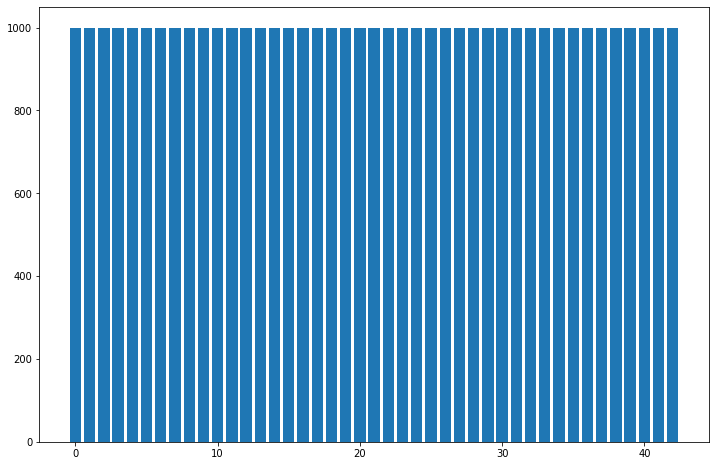

In [ ]:
unique, counts = np.unique(sampled_y_train, return_counts=True)
plt.subplots(figsize=(12,8))
plt.bar(unique, counts)

In [70]:
base_model = keras.applications.mobilenet_v2.MobileNetV2(weights="imagenet", include_top=False)
avg = keras.layers.GlobalAveragePooling2D()(base_model.output)
output = keras.layers.Dense(43, activation="softmax")(avg)
model = keras.Model(inputs=base_model.input, outputs=output)

In [ ]:
model.compile(loss="sparse_categorical_crossentropy", optimizer='adam',
metrics=["accuracy"])

In [ ]:
es = keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)

In [ ]:
history = model.fit(X_train_shuffled, y_train_shuffled, epochs=100, validation_split=0.15, batch_size=128, callbacks=[es])

Epoch 1/100
286/286 [==============================] - 24s 64ms/step - loss: 1.5556 - accuracy: 0.5445 - val_loss: 24.8989 - val_accuracy: 0.0206
Epoch 2/100
286/286 [==============================] - 17s 59ms/step - loss: 0.4482 - accuracy: 0.8581 - val_loss: 21.6638 - val_accuracy: 0.0386
Epoch 3/100
286/286 [==============================] - 17s 59ms/step - loss: 0.2126 - accuracy: 0.9329 - val_loss: 15.4021 - val_accuracy: 0.0766
Epoch 4/100
286/286 [==============================] - 17s 60ms/step - loss: 0.1548 - accuracy: 0.9518 - val_loss: 8.2861 - val_accuracy: 0.2457
Epoch 5/100
286/286 [==============================] - 17s 59ms/step - loss: 0.1162 - accuracy: 0.9637 - val_loss: 5.1844 - val_accuracy: 0.3853
Epoch 6/100
286/286 [==============================] - 17s 59ms/step - loss: 0.0980 - accuracy: 0.9697 - val_loss: 5.4340 - val_accuracy: 0.4012
Epoch 7/100
286/286 [==============================] - 17s 59ms/step - loss: 0.0970 - accuracy: 0.9705 - val_loss: 3.6186 - val

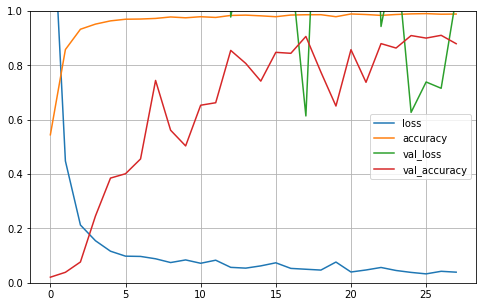

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [ ]:
X_test = X_test/255.0

In [ ]:
y_test = model.predict(X_test, verbose=1)

395/395 [==============================] - 4s 10ms/step


In [ ]:
y_test = y_test.astype('int')

In [ ]:
sample = pd.read_csv("/content/samples_oh.csv")

In [ ]:
sample.head()

,id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
imageID = np.arange(X_test.shape[0])

In [ ]:
subfile = np.append(imageID, y_test, axis=0)

In [ ]:
subfile.shape

(555720,)

In [ ]:
df_result = pd.DataFrame(y_test)
df_id = pd.DataFrame(imageID)

In [ ]:
df_result.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [ ]:
df_id.columns = [''] * len(df_id.columns)

In [ ]:
final_df = pd.concat([df_id, df_result], axis=1)

In [ ]:
final_df.head()

,,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
final_df.to_csv("finalsub.csv")